# Visualizing SpeechEmbedder SCOTUS d-vectors

In [1]:
!ls

imgs  kmeans_scotus.py	SCOTUS_SpeechEmbedder_Visualizations.ipynb


In [2]:
import os, json, pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

np.random.seed(0)

In [3]:
fp = '../../data/SCOTUS/'


with open(fp+'info/spkrs.json') as f:
    spkrs = json.load(f)
    
case_path = fp+'dvectors/sco50d/'

total_cases = (len(os.listdir(case_path))/2)
train_cases = (total_cases//10)*9
print("# total cases:" , total_cases)
print("# of training:", train_cases)

# of training: 36.0
# total cases: 43.0


### import d-vectors 

In [9]:
trn_seq_lst = []
trn_cluster_lst = []
test_seq_lst = []
test_cluster_lst = []

verbose = False

if verbose:
    print("\n", "="*50, "\n Processing SVE d-vec")
        
#load 5 case-embedded dvecs (with directory holding raw files)
i = 0
for case in os.listdir(case_path):
    if case[-7:] == 'seq.npy':
        case_id = case.split('/')[-1].split('_')[0]

        train_sequence = np.load(case_path+case)
        train_clus = np.load(case_path+case_id+'_id.npy')

        if verbose:
            if i > train_cases:
                print("-- Stored as test case --")
            else:
                print("-- Stored as train case --")
            print('Processed case:', case_id)
            print('emb shape:', np.shape(train_sequence))
            print('label shape:', np.shape(train_clus))    

        #add to training or testing list (for multiple cases       
        if i < train_cases:
            trn_seq_lst.append(train_sequence)
            trn_cluster_lst.append(train_clus)
        else:
            test_seq_lst.append(train_sequence)
            test_cluster_lst.append(train_clus)
        i+=1
            
            
# Only Judge Embeddings
# Training & Test set Generation
judge_seq = []
judge_id = []
test_seq = []
test_id = []
for i, case in enumerate(trn_cluster_lst):
    case_seq = []
    case_id = []
    for j, emb in enumerate(case):
        if emb<20:
            case_seq.append(trn_seq_lst[i][j])
            case_id.append(emb)
    judge_seq.append(case_seq)
    judge_id.append(case_id)
            
        
for i, case in enumerate(test_cluster_lst):
    case_seq = []
    case_id = []
    for j, emb in enumerate(case):
        if emb<20:
            case_seq.append(test_seq_lst[i][j])
            case_id.append(emb)
    test_seq.append(case_seq)
    test_id.append(case_id)




 Processing SVE d-vec
-- Stored as train case --
Processed case: 17-1268
emb shape: (8123, 256)
label shape: (8123,)
-- Stored as train case --
Processed case: 17-1498
emb shape: (8230, 256)
label shape: (8230,)
-- Stored as train case --
Processed case: 17-1712
emb shape: (8499, 256)
label shape: (8499,)
-- Stored as train case --
Processed case: 17-834
emb shape: (8500, 256)
label shape: (8500,)
-- Stored as train case --
Processed case: 18-1023
emb shape: (8460, 256)
label shape: (8460,)
-- Stored as train case --
Processed case: 18-1048
emb shape: (8254, 256)
label shape: (8254,)
-- Stored as train case --
Processed case: 18-1059
emb shape: (7950, 256)
label shape: (7950,)
-- Stored as train case --
Processed case: 18-1086
emb shape: (8287, 256)
label shape: (8287,)
-- Stored as train case --
Processed case: 18-1109
emb shape: (8072, 256)
label shape: (8072,)
-- Stored as train case --
Processed case: 18-1116
emb shape: (8376, 256)
label shape: (8376,)
-- Stored as train case --
P

In [12]:
print(len(trn_seq_lst),len(judge_seq),len(test_seq))

36 36 7


### Train K-Means

In [13]:
limit = 5
X = np.concatenate([case for case in judge_seq[:limit]])
Y = np.concatenate([id for id in judge_id[:limit]])
num = len(np.unique(Y))
print('Number of speakers in training set:', num)

Number of speakers in training set: 8


In [14]:
model = KMeans(n_clusters=num, random_state=0)
model.fit(X)

KMeans(random_state=0)

In [ ]:
infer = model.predict(test)  

# Single Case d-vector Heatmap

In [15]:
#create heatmap of embeddings over time
dvec = np.load(case_path+'17-1268_seq.npy')
dvec.shape

(8123, 256)

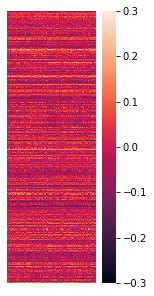

In [16]:
plt.figure(figsize=(2,5))
ax = sns.heatmap(dvec.T, vmin=-.3, vmax=.3, xticklabels = False, yticklabels = False)

# T-SNE

In [17]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=5000, learning_rate=200, n_jobs=-1)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 18757 samples in 1.044s...
[t-SNE] Computed neighbors for 18757 samples in 307.117s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18757
[t-SNE] Computed conditional probabilities for sample 2000 / 18757
[t-SNE] Computed conditional probabilities for sample 3000 / 18757
[t-SNE] Computed conditional probabilities for sample 4000 / 18757
[t-SNE] Computed conditional probabilities for sample 5000 / 18757
[t-SNE] Computed conditional probabilities for sample 6000 / 18757
[t-SNE] Computed conditional probabilities for sample 7000 / 18757
[t-SNE] Computed conditional probabilities for sample 8000 / 18757
[t-SNE] Computed conditional probabilities for sample 9000 / 18757
[t-SNE] Computed conditional probabilities for sample 10000 / 18757
[t-SNE] Computed conditional probabilities for sample 11000 / 18757
[t-SNE] Computed conditional probabilities for sample 12000 / 18757
[t-SNE] Computed conditional probabilities for 

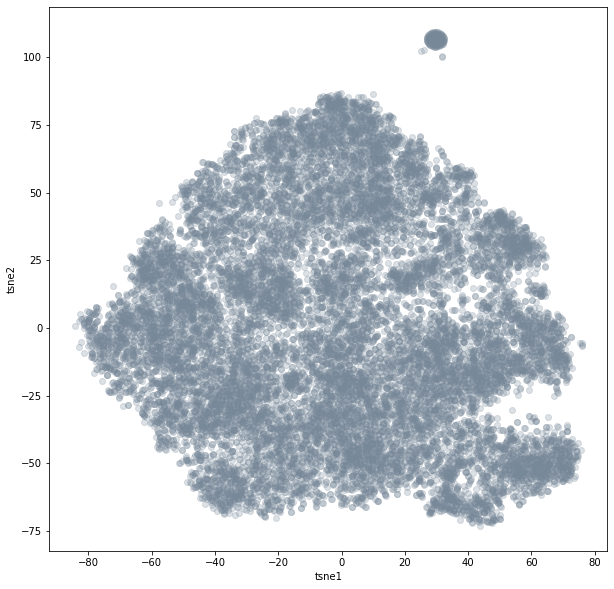

In [18]:
tsne_df_scale = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
kmeans_tsne_scale = KMeans(n_clusters=7, random_state=0).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
# labels_tsne_scale = kmeans_tsne_scale.labels_
labels_tsne_scale = Y
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.36291807889938354


In [20]:
centers = kmeans_tsne_scale.cluster_centers_

plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=y_scotus, palette='tab10', s=100, alpha=0.6).set_title('Case 17-1268 - TIMIT embeddings \nCentroid projections for K-means \n trained on Judge Embeddings', fontsize=15)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='+')
plt.legend()
plt.show()

NameError: name 'y_scotus' is not defined

<Figure size 1080x1080 with 0 Axes>

## spare code

In [ ]:
if HMM:
    print('-- HMM --')
    #from hmmlearn import hmm
    lengths = [len(case) for case in trn_seq_lst[:limit]]
    model = hmm.GaussianHMM(n_components=num, covariance_type='full', n_iter=20)
    model.fit(X, lengths)
    
with open(fp+'info/spkrs.json') as f:
    spkrs = json.load(f)
    


if save==True:   
    with open("scotus_model.pkl", "wb") as file: 
        pickle.dump(model, file)
    